<h1>Detección de anomalías por Prueba de Grubbs</h1>
El presente código corresponde a la detección de anomalías por medio de la Prueba de Grubbs.
Lo que busca este código es brindar una guía o tutorial para las personas que mantegan dudas respecto a cómo es la aplicación del método.
 
Este código está basado en la tesis:
<h1>AQUÍ VAN LOS DATOS DE LA TESIS, SOLO QUE FALTA VER EL NOMBRE FINAL DE ESTA</h1>

<H2>El conjunto de datos</H2>
El conjunto de datos utilizado para el siguiente análisis fue sacado de la siguiente publicación:


*  Sokal, R. R., & Hunter, P. E. (1955). A Morphometric Analysis of Ddt-Resistant and Non-Resistant House Fly Strains1, 2. Annals of the Entomological Society of America, 48(6), 499–507. https://doi.org/10.1093/aesa/48.6.499

El conjunto de datos es una muestra de una población de moscas domésticas a las cuales se les midieron sus alas y se registraron.
Las mediciones tomadas para la anterior investigación representan una distribución Gaussina, estos datos pertenecen al campo de la biometría.

El conjunto de datos se puede adquirir libremente en la siguiente liga:


*   https://seattlecentral.edu/qelp/sets/057/057.html#About





‌

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import shapiro

In [2]:
df = pd.read_csv("/content/sample_data/dataset_ala_mosca_domestica.csv", sep=';',
                 names = ['long_ala'])

In [3]:
df

,long_ala
0,36
1,37
2,38
3,38
4,39
...,...
95,52
96,53
97,53
98,54


Se puede observar que la muestra crea una perfecta campana de Gauss, por ende vamos a insertar un dato artificalmente para juegue el rol de anomalía y así crear un ejemplo de juguete.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


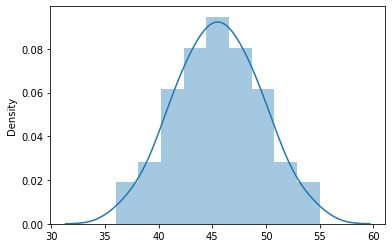

In [4]:
sns.distplot(df)

In [5]:
x = df['long_ala'].values

In [6]:
x

array([36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55])

Añadimos artificialmente un dato que se anómalo en nuestra muestra.

In [7]:
x_anom = np.append(x, [60], axis=0)

In [8]:
x_anom

array([36, 37, 38, 38, 39, 39, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42,
       42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 43, 43, 44, 44, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46,
       46, 46, 46, 46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47,
       47, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 53, 53, 54, 55, 60])

Ahora se tiene un el dato anómalo insertado artificalmente dentro del conjunto de datos, pasamos a ver de nuevo el histograma.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


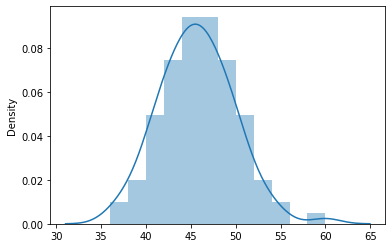

In [9]:
sns.distplot(x_anom)

A primera vista se puede indentificar la normalidad de la distribución, y es más notorio aún cuando la muestra es grande. De cualquier manera se debe aplicar una prueba estadística para comprobar formalmente la hipótesis. En este caso vamos a aplicar Shapiro-Wilk.

La significancia *a* será 0.05 o el 5 %, si nuestro p-value es mayor a *a* entonces tendremos una distribución normal.

Normalizamos el conjunto de datos para mejores resultados al aplicar la prueba de Shapiro-Wilk.

In [10]:
x_anom_norm = (x_anom - np.min(x_anom)) / (np.max(x_anom) - np.min(x_anom))

In [11]:
x_anom_norm

array([0.        , 0.04166667, 0.08333333, 0.08333333, 0.125     ,
       0.125     , 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.20833333, 0.20833333, 0.20833333, 0.20833333, 0.20833333,
       0.20833333, 0.25      , 0.25      , 0.25      , 0.25      ,
       0.25      , 0.25      , 0.25      , 0.29166667, 0.29166667,
       0.29166667, 0.29166667, 0.29166667, 0.29166667, 0.29166667,
       0.29166667, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.375     , 0.375     , 0.375     , 0.375     , 0.375     ,
       0.375     , 0.375     , 0.375     , 0.375     , 0.375     ,
       0.41666667, 0.41666667, 0.41666667, 0.41666667, 0.41666667,
       0.41666667, 0.41666667, 0.41666667, 0.41666667, 0.41666667,
       0.45833333, 0.45833333, 0.45833333, 0.45833333, 0.45833333,
       0.45833333, 0.45833333, 0.45833333, 0.45833333, 0.5       ,
       0.5       , 0.5       , 0.5       , 0.5       , 0.5    

In [12]:
shapiro_test = shapiro(x_anom_norm)

In [13]:
shapiro_test

(0.9875063896179199, 0.46520543098449707)

Aquí se puede observar que el p-value que obtuvimos es aproximado a 0.46 lo cual implica que la hipótesis se cumple, ya que p-value es mayor que *a*. Por lo tanto nuestra distribución es normal.
Se procede a calcular el *z score* de las observaciones. 

In [17]:
z = np.abs(np.mean(x_anom_norm) - x_anom_norm) / np.std(x_anom_norm)

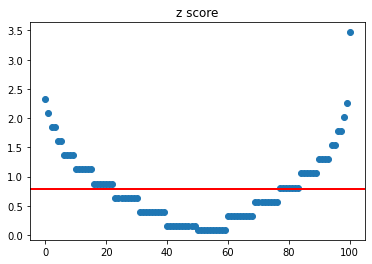

In [18]:
plt.scatter(range(len(z)), z)
plt.axhline(np.mean(z), color='red', linewidth=2)
plt.title("z score")
plt.show()

Como se puede observar, el dato que fue insertado de manera artificial se encuentra lejos de las demás observaciones, la media del z score está representada por la línea roja. Hay que recordar que se ingresó el dato de manera manual para ser una anomalía dentro de nuestra distribución.

Para definir el umbral deseado aquí es el momento perfecto para estipularlo, ya que observando la gráfica es posible determinar un divisor para distinguir anomalías de las que no lo son.

En este caso en particular, con un valor de 3.5 o 4 está bien, ya que tampoco queremos hacer un sobreajuste. Es decir, todo dato que sobrepase el valor z de 3 o 3.5 será catalogado como anomalía.

Para un ejercicio de detección de novedades, es decir, cuando se agregan datos nuevos a la variable única *x*, se calcularía el *z score* del nuevo dato y si es menor al umbral estipulado, se agrega a la variable *x* sino es rechazado. Cabe señalar que para un ejercicio de detección de novedades es sumamente barato el costo computacional para generarlo, ya que se conoce el valor de la media y de la desviación estándar con anterioridad.

Ya para terminar el proceso de detección de anomalías solo quedaría sesgar el valor anómalo y examinarlo para develar toda la información que nos puede brindar.